# Calculating the Radius from transit depth

You Belong With Me
****

Importing Modules

In [1]:
import astropy.constants as const
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
%matplotlib notebook

In [3]:
def ScreamExtractor(File):
    FILENAME = pd.read_csv(f'{File}.csv', sep=',', comment='#')
    return FILENAME

In [4]:
Directory = 'C:/Users/georg/Documents/GitHub/Iwan-and-George-Year-4-Project/Exoplanets/Sorted Data'
PlanetFile = 'Planets/469 Exoplanets'
StarFile = 'Stars/Mega All Stars'
PlanetData = ScreamExtractor(f'{Directory}/{PlanetFile}')
StarData = ScreamExtractor(f'{Directory}/{StarFile}')

In [5]:
Source = StarData['Gaia DR3 IDs']
SourceID = []
for t in Source:
    SourceID.append(f'Gaia DR2 {t}')

In [6]:
OrbitalPeriod = PlanetData['pl_orbper'] #Days
TransitDepth = PlanetData['pl_trandep'] #%
StellarRadius = StarData['Radius (Gaia)'] #Solar Radius

In [47]:
PlanetID = PlanetData['gaia_id']
PlanetRadius = []
OrbitalPeriodList = []
for n in range(len(TransitDepth)):
    if PlanetID[n] in SourceID:
        StarIndex = SourceID.index(PlanetID[n])
        OrbitalPeriodList.append(OrbitalPeriod[n])
        PlanetRadius.append(np.sqrt(TransitDepth[n]/100)*StellarRadius[StarIndex]*const.R_sun/const.R_earth)

<IPython.core.display.Javascript object>


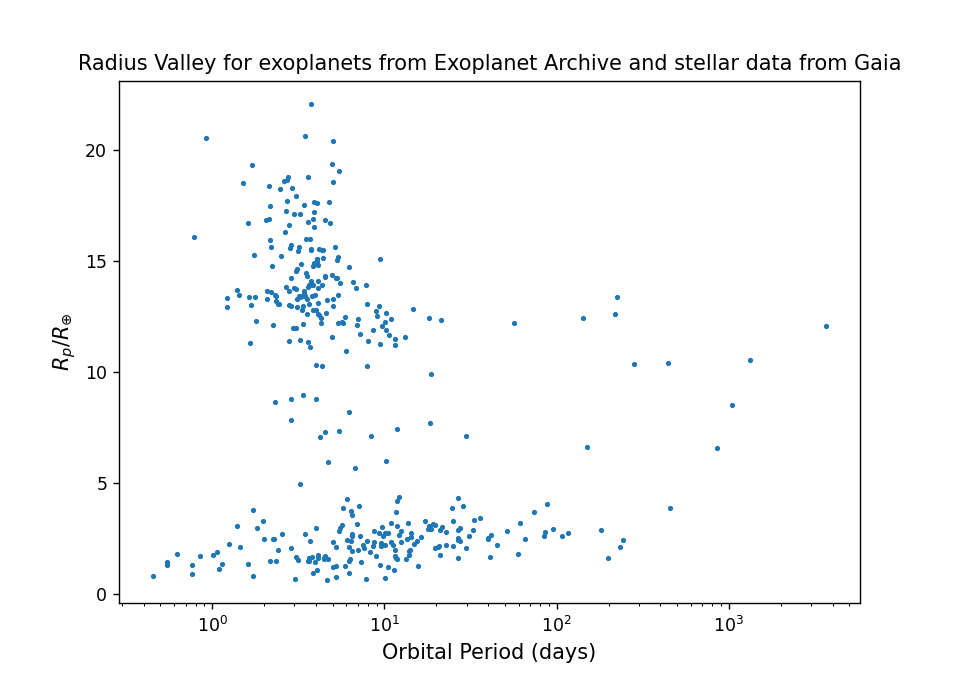

In [57]:
plt.figure()
plt.errorbar(OrbitalPeriodList, PlanetRadius, '.', markersize=4)
plt.xscale('log')
plt.xlabel('Orbital Period (days)', fontsize=12)
plt.ylabel(r'$R_p/R_{\oplus}$', fontsize=12)
plt.title('Radius Valley for exoplanets from Exoplanet Archive and stellar data from Gaia', fontsize=12)
plt.show()

You tatty git